# Assignment- Find the shortest route in your city between two points of interest.

Select a city and plan your route with a map and knowledge of traffic. You need to evaluate a shortes route (in time) from a designated initial (A) to a final destiny (J).


For a given scenario, you must evaluate the movement between points A and J in both directions. The time required to move from A to J and vice versa is the same. To assist in this evaluation, you must define internal nodes B, C, D, E, F, G, H, and I in the map provided as a reference. The number of internal nodes must be between 6 to 10 (inclusive). The connectivity of internal nodes will vary based on the specific case presented.



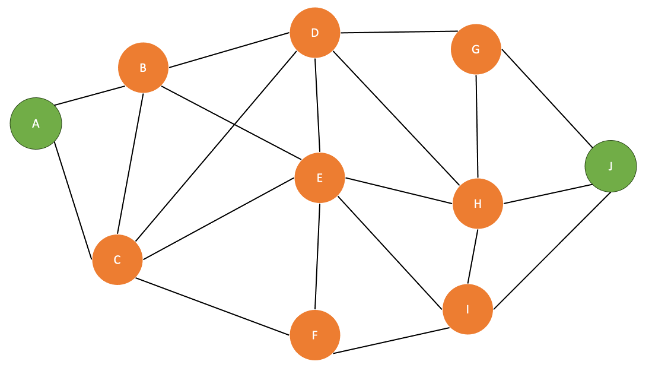

To solve a problem that requires finding the shortest path between two points in a graph, you need to implement Dijkstra’s Algorithm. You have the choice to use any data structure for representing the graph: edge list, adjacency list, adjacency matrix, etc. However, it's important to maintain consistency throughout. The weight of each connection in the graph should represent the time taken to traverse it and can be a float/decimal value.

Your team is required to develop two scenarios considering uncertainties. The first scenario is the base case with an average time. The second scenario is the rush hour with high traffic, which causes delays on most routes (not all of them). Your evaluation of both scenarios should incorporate some level of uncertainty. This means that a route can be blocked or delayed by 10 times or more. To make it more realistic, you need to identify at least three pairs of nodes that may encounter such a situation.

**Tips**:
* For the base case scenario, use Google Maps or Apple Maps to define the average time from each pair of nodes (weight).
* For the rush hour scenario, apply a factor between 1 -> 3. For example, you can define a random number using a normal distribution with media of 2 and a standard deviation of 0.5. Evaluate each case (node1->Node2) and apply your own base modification. Use the random library to solve this impact.
* Add uncertainty is a similar model for rush hour but with high impact and low probability events. Each case can be a discrete distribution (0,1) with 80% nothing happened with a 20% this unlike event will happen.  

Below is a map you can use as a reference.



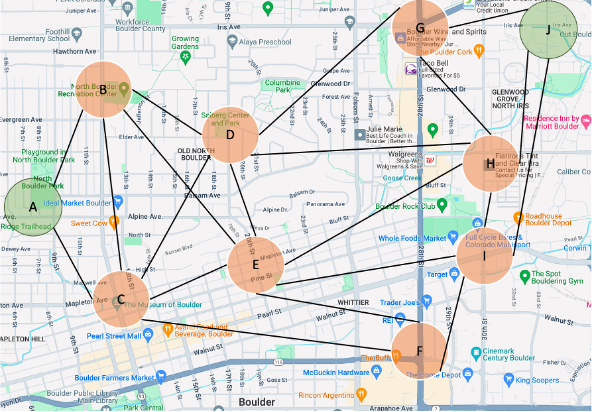

#Scenario 1- Average Time


In [ ]:
from heapq import heapify, heappop, heappush

#create a dictionary to represent the points of interest (nodes)
graph = {
   "A": {"B": 16, "C": 16 ,"D":10},
   "B": {"A": 16, "C": 5,"E": 16, "I": 17},
   "C": {"A": 16, "B": 5, "F": 9,"H": 10,"I": 16},
   "D": {"A":10, "E":12, "H":18, "I":7},
   "E": {"B": 16, "D": 12, "I": 12},
   "F": {"C": 9, "G": 8,"I": 22},
   "G": {"F": 8, "H": 7, "I": 16 },
   "H": {"C": 10, "D": 18,"G":7, "I": 14},
   "I": {"B": 17, "C": 16 , "D": 7 ,"E": 12 , "F": 22, "G": 16 ,"H": 14 , "J":3},
   "J": {"I":3}
}

class Graph:
    def __init__(self, graph: dict = {}):
      self.graph = graph  #dictionary for the adjacency list

    def shortest_distances(self, source: str):
      distances = {node: float("inf") for node in self.graph}  #initialize distances to infinity
      distances[source] = 0

      #initialize a priority queue
      pq = [(0, source)]
      heapify(pq)

      #create a set to hold visited nodes
      visited = set()

      while pq:  #while the priority queue isn't empty
        current_distance, current_node = heappop(pq)  #get the node with the min distance

        if current_node in visited:
          continue  #skip already visited nodes
        visited.add(current_node)  #else, add the node to visited set

        for neighbor, weight in self.graph[current_node].items(): #calculate the distance from current_node to the neighbor
          tentative_distance = current_distance + weight
          if tentative_distance < distances[neighbor]:
            distances[neighbor] = tentative_distance
            heappush(pq, (tentative_distance, neighbor))

      return distances

#pass the graph through our class
G = Graph(graph=graph)

In [ ]:
#test code
distances = G.shortest_distances("A")
print(distances, "\n")

to_J = distances["J"]
print(f"The shortest distance from A to J is {to_J} mins")

{'A': 0, 'B': 16, 'C': 16, 'D': 10, 'E': 22, 'F': 25, 'G': 33, 'H': 26, 'I': 17, 'J': 20} 

The shortest distance from A to J is 20 mins


#Scenario 2: High Traffic

In [ ]:
import random
from heapq import heapify, heappop, heappush

#create a dictionary to represent the points of interest (nodes)
graph = {
   "A": {"B": 16, "C": 16 ,"D":10},
   "B": {"A": 16, "C": 5,"E": 16, "I": 17},
   "C": {"A": 16, "B": 5, "F": 9,"H": 10,"I": 16},
   "D": {"A":10, "E":12, "H":18, "I":7},
   "E": {"B": 16, "D": 12, "I": 12},
   "F": {"C": 9, "G": 8,"I": 22},
   "G": {"F": 8, "H": 7, "I": 16 },
   "H": {"C": 10, "D": 18,"G":7, "I": 14},
   "I": {"B": 17, "C": 16 , "D": 7 ,"E": 12 , "F": 22, "G": 16 ,"H": 14 , "J":3},
   "J": {"I":3}
}

def apply_rush_hour_traffic(graph):
  modified_graph = {}

  for node, neighbors in graph.items(): #loop through each node and its neighbors in the original graph
    modified_graph[node] = {}
    for neighbor, weight in neighbors.items(): #loop through each neighbor of the current node
      traffic_factor = max(1, random.gauss(2, 0.5)) #normal distrib, mean=2, stand dev=0.5, min fact=1)
      rush_hour_weight = (weight * traffic_factor)

      high_impact_event = random.choices([0, 1], weights = [0.8, 0.2]) [0] #simulate high-impact event 20% probability
      if high_impact_event:
        rush_hour_weight += weight * random.uniform(0.5, 2) #if event occurs, increase weight
      modified_graph[node][neighbor] = int(rush_hour_weight)

  return modified_graph

class Graph:
    def __init__(self, graph: dict = {}):
      self.graph = graph  #dictionary for the adjacency list

    def shortest_distances(self, source: str):
      distances = {node: float("inf") for node in self.graph}  #initialize distances to infinity
      distances[source] = 0

      #initialize a priority queue
      pq = [(0, source)]
      heapify(pq)

      #create a set to hold visited nodes
      visited = set()

      while pq:  #while the priority queue isn't empty
        current_distance, current_node = heappop(pq)  #get the node with the min distance

        if current_node in visited:
          continue  #skip already visited nodes
        visited.add(current_node)  #else, add the node to visited set

        for neighbor, weight in self.graph[current_node].items(): #calculate the distance from current_node to the neighbor
          tentative_distance = current_distance + weight
          if tentative_distance < distances[neighbor]:
            distances[neighbor] = tentative_distance
            heappush(pq, (tentative_distance, neighbor))

      return distances

modified_graph = apply_rush_hour_traffic(graph)
G = Graph(graph=modified_graph)

#test code
print(modified_graph)

{'A': {'B': 32, 'C': 53, 'D': 24}, 'B': {'A': 41, 'C': 9, 'E': 34, 'I': 44}, 'C': {'A': 28, 'B': 16, 'F': 12, 'H': 20, 'I': 59}, 'D': {'A': 32, 'E': 42, 'H': 24, 'I': 10}, 'E': {'B': 25, 'D': 20, 'I': 19}, 'F': {'C': 15, 'G': 14, 'I': 58}, 'G': {'F': 8, 'H': 19, 'I': 23}, 'H': {'C': 18, 'D': 38, 'G': 22, 'I': 14}, 'I': {'B': 31, 'C': 32, 'D': 30, 'E': 19, 'F': 65, 'G': 36, 'H': 14, 'J': 6}, 'J': {'I': 8}}


In [ ]:
#test code
distances = G.shortest_distances("A")
print(distances, "\n")

to_J = distances["J"]
print(f"The shortest distance from A to J is {to_J} mins")


{'A': 0, 'B': 38, 'C': 53, 'D': 19, 'E': 38, 'F': 69, 'G': 75, 'H': 66, 'I': 36, 'J': 46} 

The shortest distance from A to J is 46 mins
